# LIMIX test script
Getting limix to run in the binder environment.

In [5]:
from numpy import ones, stack
from numpy.random import RandomState
from pandas import DataFrame

## Create data

In [7]:
random = RandomState(2)

In [8]:
# sample size
n = 100

In [9]:
# covariates
offset = ones(n) * random.randn()
age = random.randint(16, 75, n)
M = stack((offset, age), axis = 1)
M = DataFrame(stack([offset, age], axis = 1), columns = ["offset", "age"])
M["sample"] = [f"sample{i}"for i in range(n)]
M = M.set_index("sample")
print(M.head())

           offset   age
sample                 
sample0 -0.416758  38.0
sample1 -0.416758  59.0
sample2 -0.416758  34.0
sample3 -0.416758  27.0
sample4 -0.416758  56.0


In [10]:
# genetic variants
G = random.randn(n, 4)

In [11]:
# sampling the phenotype
alpha = random.randn(2)
beta = random.randn(4)
eps = random.randn(n)
y = M @ alpha + G @ beta + eps

## Run GWAS

In [12]:
from limix.qtl import scan

In [16]:
r = scan(G, y, "normal", M = M, verbose = False)
print(r)

Hypothesis 0

𝐲 ~ 𝓝(𝙼𝜶, 3.462⋅𝙸)

M     = ['offset' 'age']
𝜶     = [2.10096551 0.19582931]
se(𝜶) = [1.25826998 0.01068367]
lml   = -203.987507679645

Hypothesis 2

𝐲 ~ 𝓝(𝙼𝜶 + G𝛃, s(3.462⋅𝙸))

          lml       cov. effsizes   cand. effsizes
--------------------------------------------------
mean   -1.951e+02       9.915e-01       -6.198e-01
std     9.227e+00       9.342e-01        3.974e-01
min    -2.031e+02       1.844e-01       -1.025e+00
25%    -2.026e+02       1.959e-01       -9.275e-01
50%    -1.967e+02       5.965e-01       -6.047e-01
75%    -1.893e+02       1.831e+00       -2.970e-01
max    -1.841e+02       2.312e+00       -2.448e-01

Likelihood-ratio test p-values

       𝓗₀ vs 𝓗₂ 
----------------
mean   6.514e-02
std    8.856e-02
min    2.804e-10
25%    2.606e-07
50%    3.651e-02
75%    1.016e-01
max    1.875e-01


## Plot test

### Manhattan

In [18]:
import limix
from numpy import log10

In [21]:
df = limix.plot.load_dataset('gwas')
df = df.rename(columns={"chr": "chrom"})
print(df.head())

    chrom     pos        pv
234    10  224239  0.008867
239    10  229681  0.008482
253    10  240788  0.007212
258    10  246933  0.005676
266    10  255222  0.005929


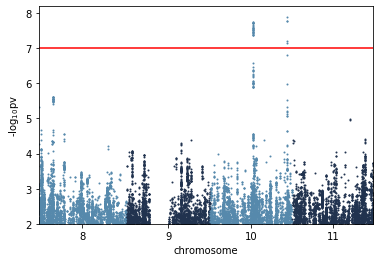

In [23]:
limix.plot.manhattan(df)
plt = limix.plot.get_pyplot()
_ = plt.axhline(-log10(1e-7), color = 'red')
_ = plt.ylim(2, plt.ylim()[1])

### QQ-plot

In [39]:
random = RandomState(1)

pv0 = random.rand(10000)
pv0[0] = 1e-6

pv1 = random.rand(10000)
pv2 = random.rand(10000)

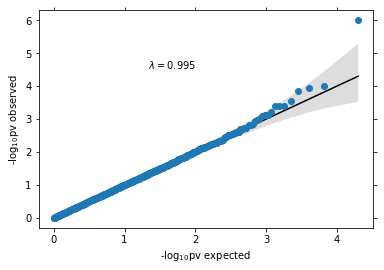

In [41]:
limix.plot.qqplot(pv0)

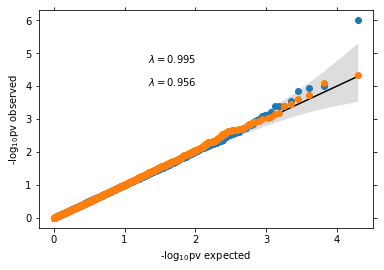

In [42]:
limix.plot.qqplot(pv0)
limix.plot.qqplot(pv1, line=False, alpha=None)

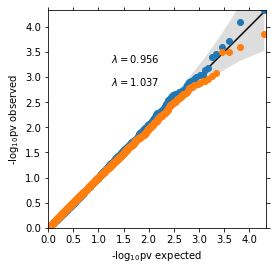

In [43]:
limix.plot.qqplot(pv1)
limix.plot.qqplot(pv2, line=False, alpha=None)
limix.plot.box_aspect()

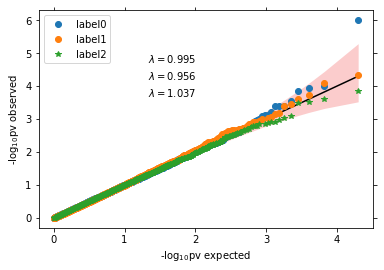

In [44]:
limix.plot.qqplot(pv0, label = 'label0', band_kws = dict(color = '#EE0000', alpha = 0.2))
limix.plot.qqplot(pv1, label = 'label1', line = False, alpha = None)
limix.plot.qqplot(pv2, label = 'label2', line = False, alpha = None, pts_kws = dict(marker = '*'))
_ = limix.plot.get_pyplot().legend()